In [1]:
#Librerias
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, Activation, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import numpy as np
import os
import cv2
from skimage import io, color
from skimage.color import rgb2gray
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from tensorflow.keras.models import load_model
from PIL import Image, ImageFilter
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
ubicacion= '/content/drive/MyDrive/Colab Notebooks/procesamiento/tarea 6/hand_sing_dataset/Train/A'
contenido1 = os.listdir(ubicacion)
len(contenido1)

1126

In [3]:
file_path2= ubicacion + "/" + contenido1[3]
img_gs = cv2.imread(file_path2)

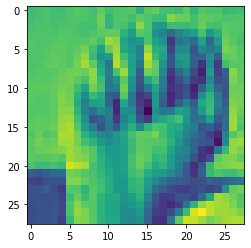

In [4]:
with Image.open(file_path2) as img:
    img.load()

type(img)
    
isinstance(img, Image.Image)

img= np.array(img)
imgplot = plt.imshow(img)
plt.show()

In [5]:
def preproceso(ubicacion):
    imagenes=[]
    letra= []
    contenido1 = os.listdir(ubicacion)
    for i in range(len(contenido1)):
        file_path1= ubicacion + "/" + contenido1[i]
        contenido2 = os.listdir(file_path1)
        for j in range(len(contenido2)):
            file_path2= file_path1 + "/" + contenido2[j]
            with Image.open(file_path2) as img:
                img.load()
            type(img)
            isinstance(img, Image.Image)
            img_gray = img.convert("L")
            edges = img_gray.filter(ImageFilter.FIND_EDGES)
            sharp_img = img_gray.filter(ImageFilter.SHARPEN)
            img_gray_smooth = sharp_img.filter(ImageFilter.SMOOTH)
            edge_enhance = img_gray_smooth.filter(ImageFilter.EDGE_ENHANCE)
            img_gs= np.array(edge_enhance)
            imagenes.append(img_gs)
            letra.append(contenido1[i])
    return imagenes, letra

In [6]:
ubicacion1= '/content/drive/MyDrive/Colab Notebooks/procesamiento/tarea 6/hand_sing_dataset/Train'
ubicacion2= '/content/drive/MyDrive/Colab Notebooks/procesamiento/tarea 6/hand_sing_dataset/Test'

Datos= preproceso(ubicacion1)
DatosT= preproceso(ubicacion2)

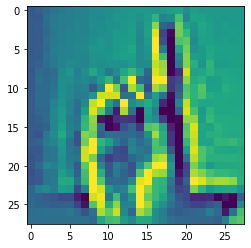

In [7]:
imgplot = plt.imshow(Datos[0][0])
plt.show()

In [8]:
#Datos de entreamiento
x= np.array(Datos[0])
Yy_train= Datos[1]
y=[]
for i in range(len(Yy_train)):
    if Yy_train[i]=='A':
        y.append([0])
    elif Yy_train[i]=='B':
        y.append([1])
    elif Yy_train[i]=='C':
        y.append([2])
    elif Yy_train[i]=='D':
        y.append([3])
    elif Yy_train[i]=='E':
        y.append([4])
    elif Yy_train[i]=='F':
        y.append([5])
    elif Yy_train[i]=='G':
        y.append([6])
    elif Yy_train[i]=='H':
        y.append([7])
    elif Yy_train[i]=='I':
        y.append([8])
    elif Yy_train[i]=='K':
        y.append([9])
    elif Yy_train[i]=='L':
        y.append([10])
    elif Yy_train[i]=='M':
        y.append([11])
    elif Yy_train[i]=='N':
        y.append([12])
    elif Yy_train[i]=='O':
        y.append([13])
    elif Yy_train[i]=='P':
        y.append([14])
    elif Yy_train[i]=='Q':
        y.append([15])
    elif Yy_train[i]=='R':
        y.append([16])
    elif Yy_train[i]=='S':
        y.append([17])
    elif Yy_train[i]=='T':
        y.append([18])
    elif Yy_train[i]=='U':
        y.append([19])
    elif Yy_train[i]=='V':
        y.append([20])
    elif Yy_train[i]=='W':
        y.append([21])
    elif Yy_train[i]=='X':
        y.append([22])
    else:
        y.append([23])

y_train= y

In [9]:
#Datos de testeo
x_test= np.array(DatosT[0])
Yy_train= DatosT[1]
y=[]
for i in range(len(Yy_train)):
    if Yy_train[i]=='A':
        y.append([0])
    elif Yy_train[i]=='B':
        y.append([1])
    elif Yy_train[i]=='C':
        y.append([2])
    elif Yy_train[i]=='D':
        y.append([3])
    elif Yy_train[i]=='E':
        y.append([4])
    elif Yy_train[i]=='F':
        y.append([5])
    elif Yy_train[i]=='G':
        y.append([6])
    elif Yy_train[i]=='H':
        y.append([7])
    elif Yy_train[i]=='I':
        y.append([8])
    elif Yy_train[i]=='K':
        y.append([9])
    elif Yy_train[i]=='L':
        y.append([10])
    elif Yy_train[i]=='M':
        y.append([11])
    elif Yy_train[i]=='N':
        y.append([12])
    elif Yy_train[i]=='O':
        y.append([13])
    elif Yy_train[i]=='P':
        y.append([14])
    elif Yy_train[i]=='Q':
        y.append([15])
    elif Yy_train[i]=='R':
        y.append([16])
    elif Yy_train[i]=='S':
        y.append([17])
    elif Yy_train[i]=='T':
        y.append([18])
    elif Yy_train[i]=='U':
        y.append([19])
    elif Yy_train[i]=='V':
        y.append([20])
    elif Yy_train[i]=='W':
        y.append([21])
    elif Yy_train[i]=='X':
        y.append([22])
    else:
        y.append([23])

y_test = y

In [10]:
#Cuando se trabaja en blanco y negro
# Flattening the images from the 28x28x1 pixels to 1D 784 pixels
X_train = x.reshape(x.shape[0], 784)
X_test = x_test.reshape(x_test.shape[0], 784)
X_train = x.astype('float32')
X_test = x_test.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

[7]


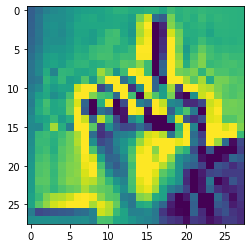

In [11]:
xs= 1
print(y[xs])
imgplot = plt.imshow(X_train[xs])
plt.show()

In [12]:
# one-hot encoding using keras' numpy-related utilities
y_train= np.array(y_train)
y_test= np.array(y_test)
n_classes = 24
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (19123, 1)
Shape after one-hot encoding:  (19123, 24)


In [13]:
# Configuración Tensorboard
from tensorflow.keras.callbacks import TensorBoard
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [14]:
#Start model Alexnet
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(28, 28,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(36, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Layer 3
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Layer 4
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

#flatten output of conv
model.add(Flatten())

model.add(Dense(24))
model.add(Activation('softmax'))

In [15]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=["acc"])
early_stop= EarlyStopping(monitor= "val_loss", patience= 4, restore_best_weights= True)
# training the model for 10 epochs
cnn= model.fit(X_train, Y_train, batch_size=200, epochs=10, validation_data=(X_test, Y_test),callbacks=[early_stop])

Epoch 1/10
96/96 [==============================] - 176s 2s/step - loss: 0.6279 - acc: 0.8309 - val_loss: 4.4507 - val_acc: 0.0608
Epoch 2/10
96/96 [==============================] - 174s 2s/step - loss: 0.0525 - acc: 0.9955 - val_loss: 5.4239 - val_acc: 0.0608
Epoch 3/10
96/96 [==============================] - 174s 2s/step - loss: 0.0189 - acc: 0.9991 - val_loss: 5.1960 - val_acc: 0.0669
Epoch 4/10
96/96 [==============================] - 174s 2s/step - loss: 0.0108 - acc: 0.9995 - val_loss: 3.7268 - val_acc: 0.2439
Epoch 5/10
96/96 [==============================] - 172s 2s/step - loss: 0.0071 - acc: 0.9996 - val_loss: 2.5641 - val_acc: 0.6253
Epoch 6/10
96/96 [==============================] - 175s 2s/step - loss: 0.0049 - acc: 0.9999 - val_loss: 2.3361 - val_acc: 0.7133
Epoch 7/10
96/96 [==============================] - 171s 2s/step - loss: 0.0036 - acc: 0.9999 - val_loss: 2.3700 - val_acc: 0.7234
Epoch 8/10
96/96 [==============================] - 174s 2s/step - loss: 0.0027 - a

Text(0.5, 1.0, 'Comportamiento de la perdida')

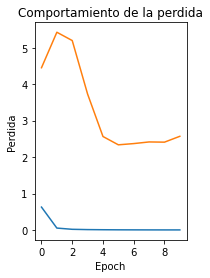

In [16]:
plt.subplot(1,2,1)
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.ylabel("Perdida")
plt.xlabel("Epoch")
plt.title("Comportamiento de la perdida")

Text(0.5, 1.0, 'Comportamiento de la precisión')

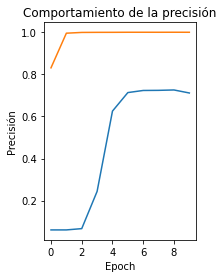

In [17]:
plt.subplot(1,2,1)
plt.plot(cnn.history['val_acc'])
plt.plot(cnn.history['acc'])
plt.ylabel("Precisión")
plt.xlabel("Epoch")
plt.title("Comportamiento de la precisión")

Matriz de confusion:


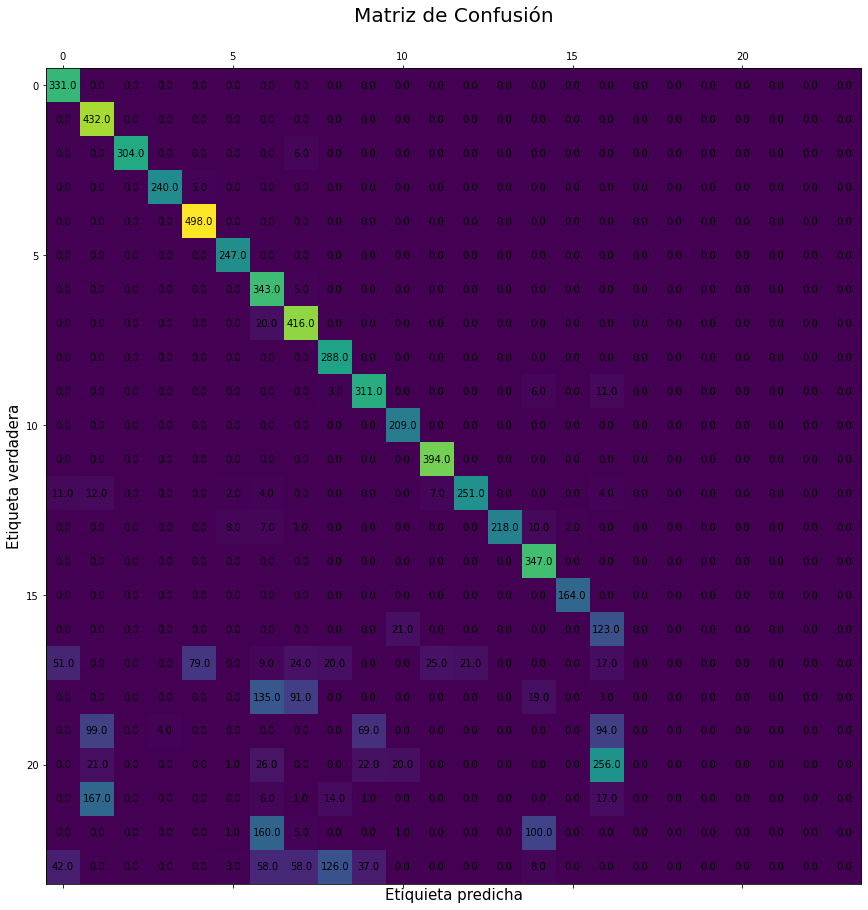

In [18]:
from numpy import argmax
predictions= model.predict(X_test)
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(argmax(predictions[i]))

y_ref= np.argmax(Y_test, axis= 1)
print('Matriz de confusion:')
cm= confusion_matrix(y_ref,  y_pred)
fig, ax= plt.subplots(figsize=(15,15))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize= 20)
plt.ylabel('Etiqueta verdadera', fontsize = 15)
plt.xlabel('Etiquieta predicha', fontsize= 15)
for(i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [ ]:
from keras.utils.version_utils import ModelVersionSelector
# Conclusione

La red neuronal es un modelo que en diversas problematicas tienen un poder predictivo alto, pero se debe considerar el tamaño de muestra que se esta 
utilizando en el modelo, para este caso con 5 capas, mas la capa de salida, podemos ver que existe un sobre ajuste, ya que en el entrenamiento tiene
un buen desempeño pero al ingresar nueva información le cuesta trabajo poder clasificar las señas del lenguaje.
en este caso los pasos a seguir es modificar la red neuronal, incrementando las capas y probando en reducir la eliminacion de prendizaje, ademas
de agregar el aumento de datos que puede ayudar al desempeño del modelo. 
Revisando las ultimas 8 letras del abecedario, el modelo no logró identificarlos corretamente debido a que tienen una similaridad con otras letras del abecedario





